# Final Project

In this project, our aim is to building a model for predicting dimond prices. Our label (output) will be `price` column. **Do not forget, this is a Classification problem!**

## Content
carat: weight of the diamond (0.2--5.01)

cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color: diamond colour, from J (worst) to D (best)

clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x: length in mm (0--10.74)

y: width in mm (0--58.9)

z: depth in mm (0--31.8)

depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table: width of top of diamond relative to widest point (43--95)

## Steps
- Read the `diamonds.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification). *Hint: Is there any imbalanced problem in the label column?*
- Split the dataset into train and test set. (Consider the imbalanced problem if is there any). Check the distribution of labels in the subsets (train and test).
- Train and evaluate Decision Trees and at least 2 different appropriate algorithm which you can choose from scikit-learn library.
- Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


Good luck :)

<h2>Your Name</h2>

# Data

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Read csv
data = pd.read_csv("diamonds.csv")
data.head()

,index,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,Very Low
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,Very Low
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,Very Low
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,Very Low
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,Very Low


In [4]:
# Describe our data for each feature and use .info() for get information about our dataset
# Analyse missing values

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53940 non-null  object 
 4   clarity  53940 non-null  object 
 5   depth    53940 non-null  float64
 6   table    53940 non-null  float64
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
 10  price    53940 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 4.5+ MB


In [102]:
data.describe()

,index,carat,depth,table,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000


In [84]:
data.isna().sum()

index      0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [103]:
data.price.value_counts()

Very Low     34663
Low          11271
Medium        4109
High          2308
Very High     1589
Name: price, dtype: int64

In [5]:
data.groupby(by="price").count()

,index,carat,cut,color,clarity,depth,table,x,y,z
price,,,,,,,,,,
High,2308,2308,2308,2308,2308,2308,2308,2308,2308,2308
Low,11271,11271,11271,11271,11271,11271,11271,11271,11271,11271
Medium,4109,4109,4109,4109,4109,4109,4109,4109,4109,4109
Very High,1589,1589,1589,1589,1589,1589,1589,1589,1589,1589
Very Low,34663,34663,34663,34663,34663,34663,34663,34663,34663,34663


# Exploratory Data Analysis

<AxesSubplot:xlabel='price', ylabel='count'>

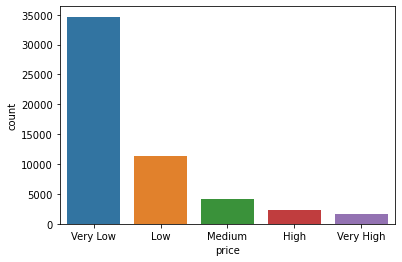

In [3]:
# Our label Distribution (countplot)
df = pd.read_csv("diamonds.csv") 

sns.countplot(x ='price',  data= df)

C:\Users\micef\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='table', ylabel='Density'>

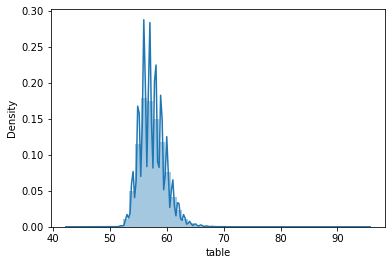

In [9]:
# Example EDA (distplot)

sns.distplot(df['table'])

# Preprocessing

- Are there any duplicated values?
- Do we need to do feature scaling?
- Do we need to generate new features?
- Split dataset into train and test sets. (0.7/0.3)

In [10]:
df.duplicated().sum()

0

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [6]:
label_encoder = LabelEncoder()
label_encoder.fit(data['clarity'])
data["clarity"]=label_encoder.transform(data['clarity'])

In [7]:

label_encoder.fit(data['color'])
data["color"]=label_encoder.transform(data['color'])
data.head()

,index,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.23,Ideal,1,3,61.5,55.0,3.95,3.98,2.43,Very Low
1,2,0.21,Premium,1,2,59.8,61.0,3.89,3.84,2.31,Very Low
2,3,0.23,Good,1,4,56.9,65.0,4.05,4.07,2.31,Very Low
3,4,0.29,Premium,5,5,62.4,58.0,4.20,4.23,2.63,Very Low
4,5,0.31,Good,6,3,63.3,58.0,4.34,4.35,2.75,Very Low


In [8]:
data["color"].value_counts()

3    11292
1     9797
2     9542
4     8304
0     6775
5     5422
6     2808
Name: color, dtype: int64

In [9]:
label_encoder.fit(data['cut'])
data["cut"]=label_encoder.transform(data['cut'])
data.head()

,index,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43,Very Low
1,2,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31,Very Low
2,3,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31,Very Low
3,4,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63,Very Low
4,5,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75,Very Low


In [10]:
label_encoder = LabelEncoder()
data["Label"] = label_encoder.fit_transform(data["price"]) 
data.head()

,index,carat,cut,color,clarity,depth,table,x,y,z,price,Label
0,1,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43,Very Low,4
1,2,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31,Very Low,4
2,3,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31,Very Low,4
3,4,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63,Very Low,4
4,5,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75,Very Low,4


In [11]:
data["Label"].value_counts()

4    34663
1    11271
2     4109
0     2308
3     1589
Name: Label, dtype: int64

In [30]:
# Checking encoded labels
categories = list(label_encoder.inverse_transform([0, 1, 2, 3, 4]))
categories

['High', 'Low', 'Medium', 'Very High', 'Very Low']

In [ ]:
# Dropping unnecessary columns
clases = list(set(data.price))
data.drop(["price"], axis=1, inplace=True)

In [32]:
X, y = data.iloc[: , :-1], data.iloc[: , -1]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Feature: 0, Score: 0.27653
Feature: 1, Score: 0.02254
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00003
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.70014
Feature: 9, Score: 0.00076


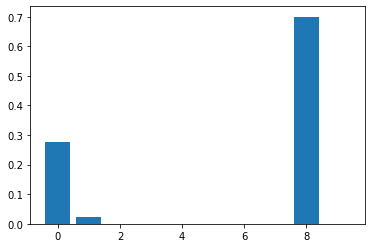

In [69]:
# decision tree for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor


model = DecisionTreeRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# ML Application

- Define models.
- Fit models.
- Evaluate models for both train and test dataset.
- Generate Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score.
- Analyse occurrence of overfitting and underfitting. If there is any of them, try to overcome it within a different section.

In [50]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train,y_train)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))

Accuracy of train: 0.9998675777318714
Accuracy of test: 0.9995056235323199


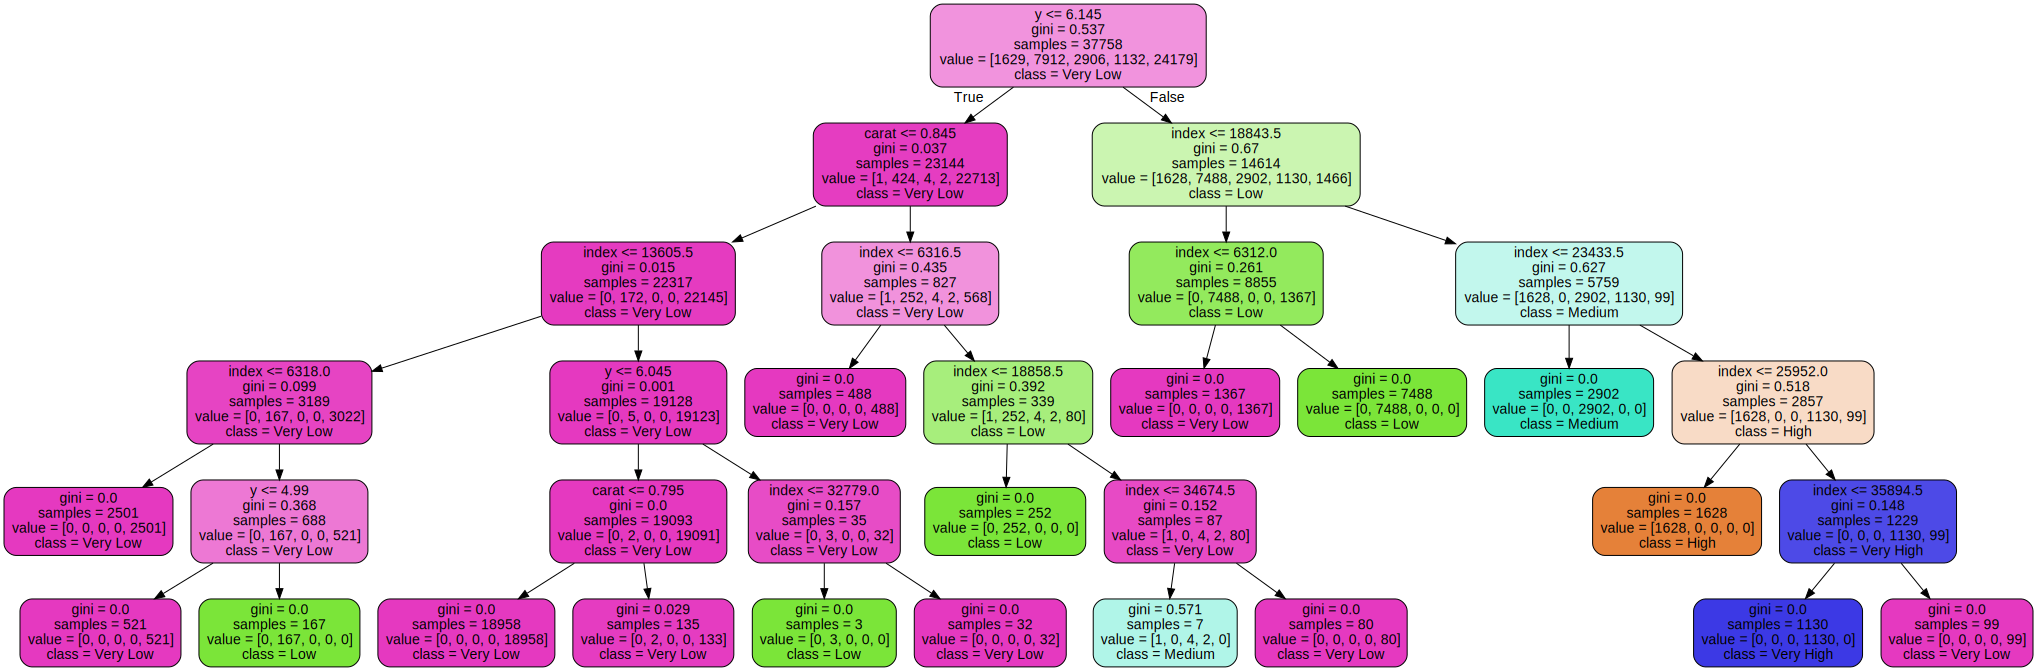

In [42]:

import os
from sklearn.tree import export_graphviz

# We need to locate graphiz directory for visualization (after conda)
os.environ["PATH"] += ';' + r'C:\Users\micef\anaconda3\Library\bin\graphviz'

import graphviz

dot_data = export_graphviz(clf, out_file=None,
                     feature_names=X.columns,
                     class_names=categories,
                     filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph


In [39]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
pred = clf.predict(X_test)
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       679
           1       1.00      1.00      1.00      3359
           2       1.00      1.00      1.00      1203
           3       1.00      1.00      1.00       457
           4       1.00      1.00      1.00     10484

    accuracy                           1.00     16182
   macro avg       1.00      1.00      1.00     16182
weighted avg       1.00      1.00      1.00     16182



In [40]:
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Precision = 0.9993847920406317
Recall = 0.9991860373689212
Accuracy = 0.9995056235323199
F1 Score = 0.9992849142075482


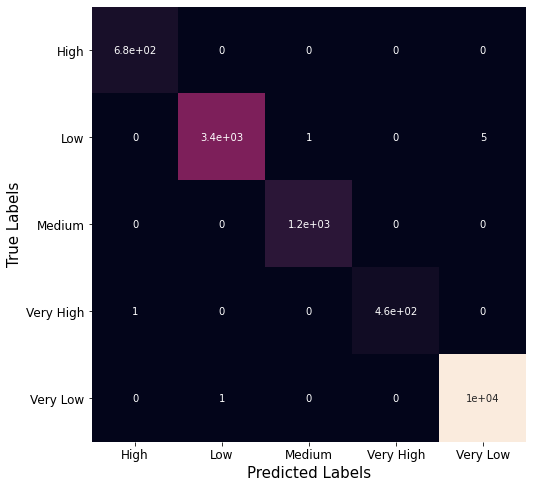

In [41]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_n = scaler.transform(X_train)
X_test_n = scaler.transform(X_test)

In [54]:
from sklearn.cluster import KMeans

modelk = KMeans(n_clusters=1)

In [55]:
modelk.fit(X_train_n)

KMeans(n_clusters=1)

In [57]:
# model score, Opposite of the value of X on the K-means objective.
print("Train score:", modelk.score(X_train_n))
print("Test score:",modelk.score(X_test_n))

Train score: -377579.9999999999
Test score: -160986.5298353212


In [59]:
train=[]
test=[]

for n in range(1, 10):
    modelk = KMeans(n_clusters=n)
    modelk.fit(X_train_n, y_train)
    
    train.append(modelk.score(X_train_n, y_train))
    test.append(modelk.score(X_test_n, y_test))

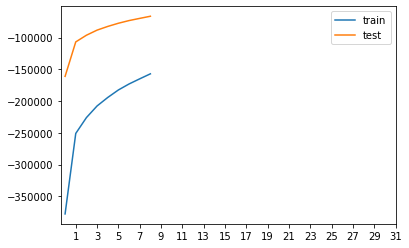

In [60]:
plt.plot(train)
plt.plot(test)
plt.legend(("train", "test"))
plt.xticks(range(1, 33, 2))
plt.show()

In [61]:

var = []
for n in range(1, 10):
    modelk = KMeans(n_clusters=n)
    modelk.fit(X_train_n)
    
    var.append(model.inertia_)  

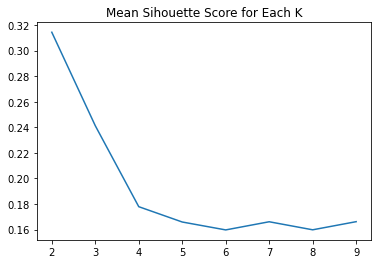

In [63]:
from sklearn.metrics import silhouette_score
silhouette = []

for n in range(2, 10):
    modelk = KMeans(n_clusters=n)
    modelk.fit(X_train_n)
    label=modelk.predict(X_train_n)
    silhouette.append(silhouette_score(X_train_n,label))
    

ax = plt.plot(silhouette)
plt.xticks(range(8), range(2,10))
plt.title("Mean Sihouette Score for Each K")
plt.show()

C:\Users\micef\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


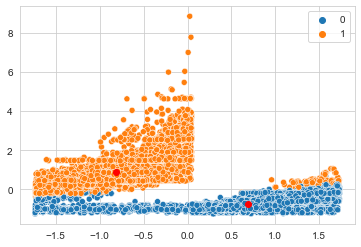

In [73]:
modelk = KMeans(n_clusters=2,random_state=42)
modelk.fit(X_train_n)

clusters = modelk.predict(X_train_n)

sns.scatterplot(X_train_n.T[0], X_train_n.T[1], hue=clusters)
plt.scatter(x=modelk.cluster_centers_[0][0], y=modelk.cluster_centers_[0][1], color='r')
plt.scatter(x=modelk.cluster_centers_[1][0], y=modelk.cluster_centers_[1][1], color='r')


# Evaluation

- Select the best performing model and write your comments about why choose this model.
- Analyse results and make comment about how you can improve model.